In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("FIFA World Cup Attendance.csv")

In [3]:
df.head(10)

,Unnamed: 0,Year,Hosts,Total_Attendance,Matches,Average_Attendance,Number,Venue,Game(s)
0,0,1930,Uruguay,590549,18,32808,93000,"Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, Semi-final"
1,1,1934,Italy,363000,17,21353,55000,"Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, Final"
2,2,1938,France,375700,18,20872,58455,"Olympique de Colombes, Paris","France 1–3 Italy, Quarter-final"
3,3,1950,Brazil,1045246,22,47511,"173,850[86]","Maracanã Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, Deciding match"
4,4,1954,Switzerland,768607,26,29562,63000,"Wankdorf Stadium, Bern","West Germany 3–2 Hungary, Final"
5,5,1958,Sweden,819810,35,23423,50928,"Ullevi Stadium, Gothenburg","Brazil 2–0 Soviet Union, Group stage"
6,6,1962,Chile,893172,32,27912,68679,"Estadio Nacional, Santiago","Brazil 4–2 Chile, Semi-final"
7,7,1966,England,1563135,32,48848,98270,"Wembley Stadium, London","England 4–2 West Germany, Final"
8,8,1970,Mexico,1603975,32,50124,108192,"Estadio Azteca, Mexico City","Mexico 1–0 Belgium, Group stage"
9,9,1974,West Germany,1865753,38,49099,83168,"Olympiastadion, Munich","West Germany 1–0 Chile, Group stage"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          23 non-null     int64 
 1   Year                23 non-null     object
 2   Hosts               23 non-null     object
 3   Total_Attendance    23 non-null     int64 
 4   Matches             23 non-null     int64 
 5   Average_Attendance  23 non-null     int64 
 6   Number              23 non-null     object
 7   Venue               23 non-null     object
 8   Game(s)             22 non-null     object
dtypes: int64(4), object(5)
memory usage: 1.7+ KB


In [5]:
df.describe()

,Unnamed: 0,Total_Attendance,Matches,Average_Attendance
count,23.00000,2.300000e+01,23.000000,23.000000
mean,11.00000,3.820585e+06,83.826087,42753.000000
std,6.78233,8.810542e+06,192.643017,11859.896577
min,0.00000,3.630000e+05,17.000000,20872.000000
25%,5.50000,9.692090e+05,32.000000,36690.000000
50%,11.00000,2.109723e+06,52.000000,46039.000000
75%,16.50000,3.105312e+06,64.000000,49384.500000
max,22.00000,4.393673e+07,964.000000,68991.000000


In [6]:
df.shape

(23, 9)

### Check year

In [7]:
df['Year']

0        1930
1        1934
2        1938
3        1950
4        1954
5        1958
6        1962
7        1966
8        1970
9        1974
10       1978
11       1982
12       1986
13       1990
14       1994
15       1998
16       2002
17       2006
18       2010
19       2014
20       2018
21       2022
22    Overall
Name: Year, dtype: object

In [8]:
# We dont need last row so we drop it.

df.drop(df.loc[df['Year'] == 'Overall'].index,axis='index',inplace=True)

In [9]:
df.tail(1).index

RangeIndex(start=21, stop=22, step=1)

In [10]:
df.tail()

,Unnamed: 0,Year,Hosts,Total_Attendance,Matches,Average_Attendance,Number,Venue,Game(s)
17,17,2006,Germany,3359439,64,52491,72000,"Olympiastadion, Berlin","Germany 1–1 (4–2p) Argentina, Quarter-final"
18,18,2010,South Africa,3178856,64,49670,84490,"Soccer City, Johannesburg","Spain 1–0 Netherlands, Final"
19,19,2014,Brazil,3429873,64,53592,74738,"Maracanã Stadium, Rio de Janeiro","Germany 1–0 Argentina, Final"
20,20,2018,Russia,3031768,64,47371,78011,"Luzhniki Stadium, Moscow","France 4–2 Croatia, Final"
21,21,2022,Qatar,3404252,64,53191,88966,"Lusail Stadium, Qatar","Argentina 3–3 (4–2p) France, Final"


In [11]:
# Changing the data type of year column
df['Year']=df['Year'].astype(int)

In [12]:
df.Year

0     1930
1     1934
2     1938
3     1950
4     1954
5     1958
6     1962
7     1966
8     1970
9     1974
10    1978
11    1982
12    1986
13    1990
14    1994
15    1998
16    2002
17    2006
18    2010
19    2014
20    2018
21    2022
Name: Year, dtype: int32

In [15]:
#Strind formatting 
"%s %o %.2f %d" % ("Hello", 71, 45836.12589, 45 )

'%.2f%s' % (0.235,['','K', 'M', 'G', 'T', 'P'][1])

'0.23K'

In [16]:
#print(['','K', 'M', 'G', 'T', 'P'][1])

K


### Audience in each country

Text(0.5, 1.0, 'Audience from each country (in millions)')

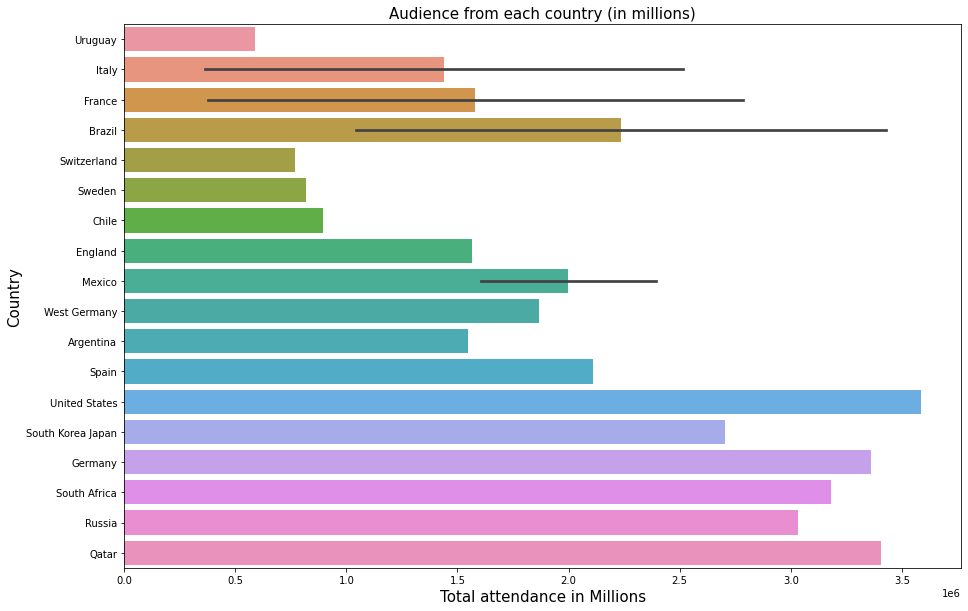

In [26]:
def human_format(num):
    magnitude=0
    while abs(num)>=1000:
        magnitude+=1
        num/=1000
    return '%.2f%s' %(num,['','k','M','G','T','P'][magnitude])
attendacelist=[human_format(x) for x in df['Total_Attendance']]

##Graph plotting
plt.figure(figsize=(15,10))
# sns.set(style='')
g=sns.barplot(data=df,x='Total_Attendance',y='Hosts')
g.set_xlabel('Total attendance in Millions',fontsize=15)
g.set_ylabel('Country',fontsize=15)
g.set_title('Audience from each country (in millions)',fontsize=15)

The United states have the highest attendance of all the countries

## FIFA final results 

In [29]:
df1=pd.read_csv('List of FIFA World Cup finals.csv')
df1.head(10)

,Unnamed: 0,Year,Host,Champion,Score,Runner_up,Third,Score.1,Fourth,No. _ofteams
0,0,1930,Uruguay,Uruguay,"4–2 Estadio Centenario, Montevideo",Argentina,United States,– [n 1],Yugoslavia,13
1,1,1934,Italy,Italy,"2–1 (a.e.t.) Stadio Nazionale PNF, Rome",Czechoslovakia,Germany,"3–2 Stadio Giorgio Ascarelli, Naples",Austria,16
2,2,1938,France,Italy,"4–2 Stade de Colombes, Paris",Hungary,Brazil,"4–2 Parc Lescure, Bordeaux",Sweden,15
3,3,1942,(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II)
4,4,1946,(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II)
5,5,1950,Brazil,Uruguay,"2–1 [n 2]Maracanã, Rio de Janeiro",Brazil,Sweden,"3–1 [n 2] Pacaembu, São Paulo",Spain,13
6,6,1954,Switzerland,West Germany,"3–2 Wankdorfstadion, Bern",Hungary,Austria,"3–1 Hardturm, Zürich",Uruguay,16
7,7,1958,Sweden,Brazil,"5–2 Råsundastadion, Solna",Sweden,France,"6–3 Ullevi, Gothenburg",West Germany,16
8,8,1962,Chile,Brazil,"3–1 Estadio Nacional, Santiago",Czechoslovakia,Chile,"1–0 Estadio Nacional, Santiago",Yugoslavia,16
9,9,1966,England,England,"4–2 (a.e.t.) Wembley Stadium, London",West Germany,Portugal,"2–1 Wembley Stadium, London",Soviet Union,16


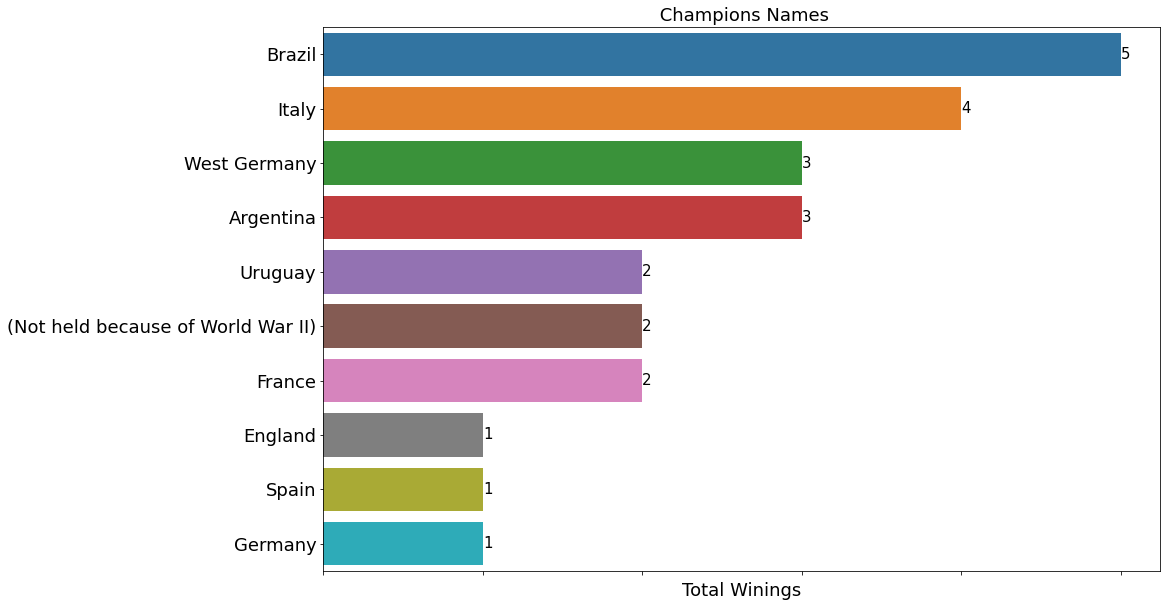

In [44]:
plt.figure(figsize=(15,10))
ax=sns.countplot(y='Champion',data=df1,order=df1['Champion'].value_counts().index)
ax.set_yticklabels( ax.get_yticklabels(), fontsize = 18)
ax.set_title(' Champions Names', fontsize = 18)
ax.set_ylabel('')
ax.set_xlabel('Total Winings', fontsize = 18)
ax.set(xticklabels=[])
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

#### Year of winning of each country

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    25 non-null     int64 
 1   Year          25 non-null     int64 
 2   Host          25 non-null     object
 3   Champion      24 non-null     object
 4   Score         24 non-null     object
 5   Runner_up     24 non-null     object
 6   Third         24 non-null     object
 7   Score.1       24 non-null     object
 8   Fourth        24 non-null     object
 9   No. _ofteams  25 non-null     object
dtypes: int64(2), object(8)
memory usage: 2.1+ KB


In [54]:
winners=df1.groupby(by=['Champion']).apply(lambda x:x.sort_values(by='Year',ignore_index=True))[['Year','Runner_up']]
winners

Year                           Runner_up
Champion                                                                      
(Not held because of World War II) 0  1942  (Not held because of World War II)
                                   1  1946  (Not held because of World War II)
Argentina                          0  1978                         Netherlands
                                   1  1986                        West Germany
                                   2  2022                              France
Brazil                             0  1958                              Sweden
                                   1  1962                      Czechoslovakia
                                   2  1970                               Italy
                                   3  1994                               Italy
                                   4  2002                             Germany
England                            0  1966                        West Germany
France                             0  1998                              Brazil
                                   1  2018                             Croatia
Germany                            0  2014                           Argentina
Italy                              0  1934                      Czechoslovakia
                                   1  1938                             Hungary
                                   2  1982                        West Germany
                                   3  2006                              France
Spain                              0  2010                         Netherlands
Uruguay                            0  1930                           Argentina
                                   1  1950                              Brazil
West Germany                       0  1954                             Hungary
                                   1  1974                         Netherlands
                                   2  1990                           Argentina

#### Awards Dataset

In [56]:
df2=pd.read_csv('FIFA World Cup Award.csv')
df2.head(10)

,Unnamed: 0,World _Cup,Golden _Ball,Golden _Boot,Goals,Golden _Glove,Clean _sheets,FIFA _Young _Player_ Award,FIFA _Fair _Play _Trophy
0,0,1930 Uruguay,Not Awarded,Guillermo Stábile,8,Not Awarded,0,Not Awarded,Not Awarded
1,1,1934 Italy,Not Awarded,Oldřich Nejedlý,5,Not Awarded,0,Not Awarded,Not Awarded
2,2,1938 France,Not Awarded,Leônidas,7,Not Awarded,0,Not Awarded,Not Awarded
3,3,1950 Brazil,Not Awarded,Ademir,8,Not Awarded,0,Not Awarded,Not Awarded
4,4,1954 Switzerland,Not Awarded,Sándor Kocsis,11,Not Awarded,0,Not Awarded,Not Awarded
5,5,1958 Sweden,Not Awarded,Just Fontaine,13,Not Awarded,0,Pelé,Not Awarded
6,6,1962 Chile,Not Awarded,Flórián Albert Garrincha Vavá Valentin Ivanov ...,4,Not Awarded,0,Flórián Albert,Not Awarded
7,7,1966 England,Not Awarded,Eusébio,9,Not Awarded,0,Franz Beckenbauer,Not Awarded
8,8,1970 Mexico,Not Awarded,Gerd Müller,10,Not Awarded,0,Teófilo Cubillas,Peru
9,9,1974 West Germany,Not Awarded,Grzegorz Lato,7,Not Awarded,0,Władysław Żmuda,West Germany


In [57]:
df2['Year']=df['Year']
df2.head()

,Unnamed: 0,World _Cup,Golden _Ball,Golden _Boot,Goals,Golden _Glove,Clean _sheets,FIFA _Young _Player_ Award,FIFA _Fair _Play _Trophy,Year
0,0,1930 Uruguay,Not Awarded,Guillermo Stábile,8,Not Awarded,0,Not Awarded,Not Awarded,1930
1,1,1934 Italy,Not Awarded,Oldřich Nejedlý,5,Not Awarded,0,Not Awarded,Not Awarded,1934
2,2,1938 France,Not Awarded,Leônidas,7,Not Awarded,0,Not Awarded,Not Awarded,1938
3,3,1950 Brazil,Not Awarded,Ademir,8,Not Awarded,0,Not Awarded,Not Awarded,1950
4,4,1954 Switzerland,Not Awarded,Sándor Kocsis,11,Not Awarded,0,Not Awarded,Not Awarded,1954


#### Player who won golden boots in 2022

In [75]:
# golden_boots=df2[df2['Year']==2022][['Golden _Boot','Year','World _Cup']].reset_index()
golden_boots=df2[df2['Year']==2022].loc[:,['Golden _Boot','Year','World _Cup']].reset_index()
golden_boots

,index,Golden _Boot,Year,World _Cup
0,21,Kylian Mbappé,2022,2022 Qatar


#### Player who won golden ball in 2022

In [76]:
golden_ball=df2[df2['Year']==2022].loc[:,['Golden _Ball','Year','World _Cup']].reset_index()
golden_ball

,index,Golden _Ball,Year,World _Cup
0,21,Lionel Messi,2022,2022 Qatar
